In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pandas as pd
plt.style.use('ggplot')

In [3]:
deaths = pd.read_csv('deaths.txt')
pumps = pd.read_csv('pumps.txt')
print deaths.head()
print pumps.head()

           X          Y
0  13.588010  11.095600
1   9.878124  12.559180
2  14.653980  10.180440
3  15.220570   9.993003
4  13.162650  12.963190
           X          Y
0   8.651201  17.891600
1  10.984780  18.517851
2  13.378190  17.394541
3  14.879830  17.809919
4   8.694768  14.905470


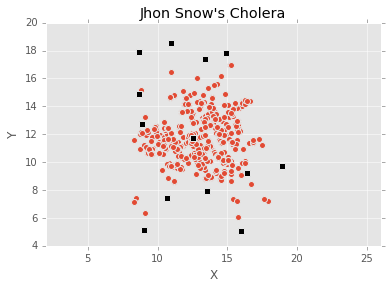

In [4]:
plt.plot(deaths['X'], deaths['Y'], 'o', lw=0, mew=1, mec='0.9', ms=6) # marker edge color/width, marker size
plt.plot(pumps['X'], pumps['Y'], 'ks', lw=0, mew=1, mec='0.9', ms=6)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jhon Snow\'s Cholera')

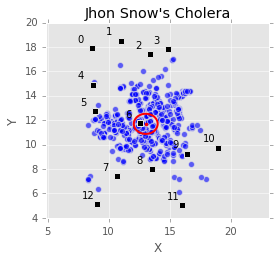

In [5]:
fig = plt.figure(figsize=(4, 3.5))
ax = fig.add_subplot(111)
plt.plot(deaths['X'], deaths['Y'], 'bo', lw=0, mew=1, mec='0.9', ms=6, alpha=0.6) # marker edge color/width, marker size
plt.plot(pumps['X'], pumps['Y'], 'ks', lw=0, mew=1, mec='0.9', ms=6)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jhon Snow\'s Cholera')
from matplotlib.patches import Ellipse
e = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), 
            width=deaths.X.std(), height=deaths.Y.std(), lw=2, fc='None', ec='r', zorder=10)
ax.add_artist(e)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(), 'r.', lw=2)
for i in pumps.index:
    plt.annotate(s='%d'%i, xy=(pumps[['X', 'Y']].loc[i]), xytext=(-15, 6), textcoords='offset points', color='k')


In [6]:
# calculate the nearing pump for each death
deaths['C'] = [np.argmin(norm(pumps - deaths.iloc[i,:2], axis=1)) for i in xrange(len(deaths))]
deaths.head()

,X,Y,C
0,13.588010,11.095600,6
1,9.878124,12.559180,5
2,14.653980,10.180440,9
3,15.220570,9.993003,9
4,13.162650,12.963190,6


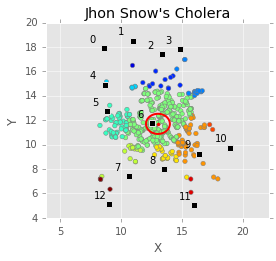

In [7]:
fig = plt.figure(figsize=(4, 3.5))
ax = fig.add_subplot(111)
plt.scatter(deaths['X'], deaths['Y'], marker='o', lw=0.5, color=plt.cm.jet(deaths.C/12), edgecolors='0.5')
plt.plot(pumps['X'], pumps['Y'], 'ks', lw=0, mew=1, mec='0.9', ms=6)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jhon Snow\'s Cholera')
from matplotlib.patches import Ellipse
e = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), 
            width=deaths.X.std(), height=deaths.Y.std(), lw=2, fc='None', ec='r', zorder=10)
ax.add_artist(e)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(), 'r.', lw=2)
for i in pumps.index:
    plt.annotate(s='%d'%i, xy=(pumps[['X', 'Y']].loc[i]), xytext=(-15, 6), textcoords='offset points', color='k')

In [8]:
#################
d2 = pd.read_hdf('../LinearRegression/ch4data.h5').dropna()
rates = d2[['dfe', 'gdp', 'both']].as_matrix().astype('float')
print rates.shape

(141, 3)


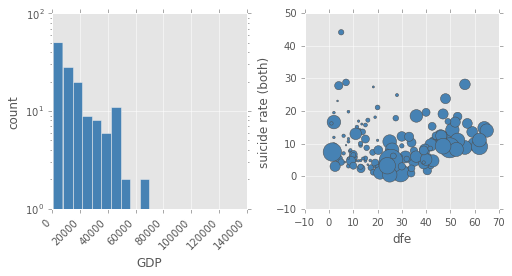

In [9]:
plt.figure(figsize=(8, 3.5))
plt.subplot(121)
_ = plt.hist(rates[:, 1], bins=20, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('count')
plt.subplot(122)
plt.scatter(rates[:, 0], rates[:, 2], s=141*4*rates[:, 1] / rates[:, 1].max(), edgecolor='0.3', color='steelblue')
plt.xlabel('dfe')
plt.ylabel('suicide rate (both)')
plt.subplots_adjust(wspace=0.3)

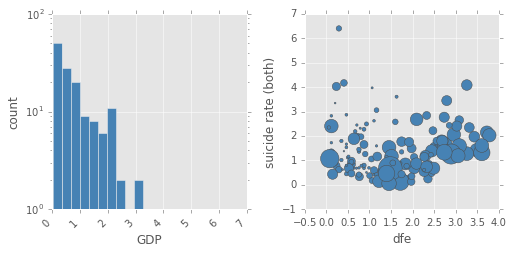

In [10]:
from scipy.cluster.vq import whiten
w = whiten(rates)  # convert to unit variance, k-means prerequisite
plt.figure(figsize=(8, 3.5))
plt.subplot(121)
_ = plt.hist(w[:, 1], bins=20, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('count')
plt.subplot(122)
plt.scatter(w[:, 0], w[:, 2], s=141*4*w[:, 1] / w[:, 1].max(), edgecolor='0.3', color='steelblue')
plt.xlabel('dfe')
plt.ylabel('suicide rate (both)')
plt.subplots_adjust(wspace=0.3)

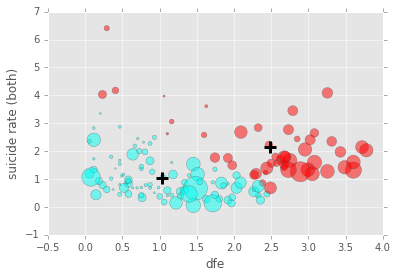

In [11]:
from sklearn.cluster import KMeans
k = 2
model = KMeans(n_clusters=k).fit(w[:, [0, 2]])

plt.scatter(w[:, 0], w[:, 2], s=141*4*w[:, 1] / w[:, 1].max(), edgecolor='0.3',
            color=plt.cm.get_cmap("hsv", k+1)(model.labels_), alpha=0.5)
plt.xlabel('dfe')
plt.ylabel('suicide rate (both)')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='+',
            color='k', s=141, lw=3)

(0, 7)

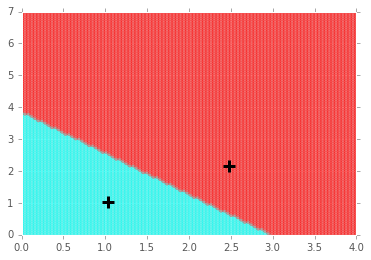

In [12]:
x, y = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 7, 100))
x, y = x.reshape((-1, 1)), y.reshape((-1, 1))
p = model.predict(np.hstack((x, y)))
plt.scatter(x, y, color=plt.cm.get_cmap("hsv", k+1)(p), alpha=0.3)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='+',
            color='k', s=141, lw=3)
plt.xlim((0, 4))
plt.ylim((0, 7))

In [13]:
############
import astropy.coordinates as coord
import astropy.units as u
import astropy.constants as c

In [14]:
uzcat = pd.read_table('uzcJ2000.tab', sep='\t', dtype='str', header=16, 
                      names=['ra', 'dec', 'Zmag', 'cz', 'cze', 'T', 'U',
                             'Ne', 'Zname', 'C', 'Ref', 'Oname', 'M', 'N'], skiprows=[17])
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,000237.9,+163838,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,000246.3,+185310,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,000257.0,+041231,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,000302.9,+185221,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,000305.6,-015450,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [15]:
uzcat['ra'] = uzcat['ra'].apply(lambda x: '%sh%sm%ss' % (x[:2], x[2:4], x[4:]))
uzcat['dec'] = uzcat['dec'].apply(lambda x: '%sd%sm%ss' % (x[:3], x[3:5], x[5:]))
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,00h02m37.9s,+16d38m38s,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,00h02m46.3s,+18d53m10s,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,00h02m57.0s,+04d12m31s,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,00h03m02.9s,+18d52m21s,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,00h03m05.6s,-01d54m50s,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [16]:
uzcat2 = uzcat.applymap(lambda x: np.nan if x.isspace() else x.strip())
uzcat2['cz'] = uzcat2['cz'].astype('float')
uzcat2['Zmag'] = uzcat2['Zmag'].astype('float')
uzcat2.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,00h02m37.9s,+16d38m38s,14.9,6350.0,19,A,1,0,000000+16220,F,NaN,I5378S,NaN,NaN
1,00h02m46.3s,+18d53m10s,14.8,7864.0,47,A,0,0,000012+18370,Z,0650,00002+1837,NaN,NaN
2,00h02m57.0s,+04d12m31s,15.5,8695.0,40,E,0,0,000030+03560,Z,2700,00005+0356,NaN,NaN
3,00h03m02.9s,+18d52m21s,15.5,8007.0,39,E,0,0,000030+18360,Z,0650,00005+1836,NaN,NaN
4,00h03m05.6s,-01d54m50s,14.3,7298.0,42,B,0,0,000036-02110,Z,2218,00006-0211,NaN,NaN


In [17]:
coords_uzc = coord.SkyCoord(uzcat2['ra'], uzcat2['dec'], frame='fk5', equinox='J2000')
color_czs = (uzcat2['cz'] + abs(uzcat2['cz'].min())) / (uzcat2['cz'].max() + abs(uzcat2['cz'].min())) 

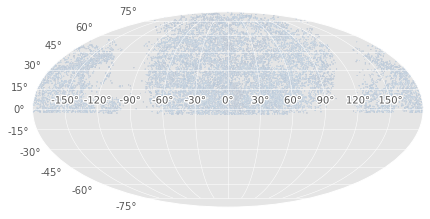

In [18]:
from matplotlib.patheffects import withStroke
whitebg = withStroke(foreground='w', linewidth=2.5)
fig = plt.figure(figsize=(8, 3.5), facecolor='w')
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords_uzc.ra.radian - np.pi, coords_uzc.dec.radian, c=plt.cm.Blues_r(color_czs),
            s=4, marker='.', zorder=-1)
#plt.grid()
for label in ax.get_xticklabels():
    label.set_path_effects([whitebg])

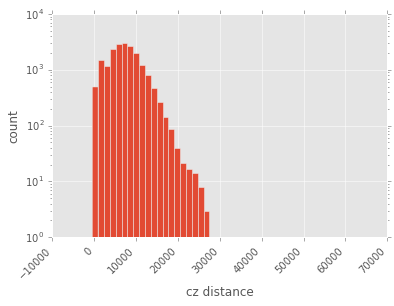

In [19]:
uzcat2.cz.hist(bins=50)
plt.yscale('log')
plt.xlabel('cz distance')
plt.ylabel('count')
_ = plt.xticks(rotation=45, ha='right')

In [20]:
uzc_czs = uzcat2['cz'].as_matrix() 
uzcat2['Zmag'] = uzcat2['Zmag'].astype('float') 
decmin = 15 
decmax = 30 
ramin = 90 
ramax = 295 
czmin = 0 
czmax = 12500 
selection_dec = (coords_uzc.dec.deg > decmin) * (coords_uzc.dec.deg < decmax) 
selection_ra = (coords_uzc.ra.deg > ramin) * (coords_uzc.ra.deg < ramax) 
selection_czs = (uzc_czs > czmin) * (uzc_czs < czmax) 
selection= selection_dec * selection_ra * selection_czs 

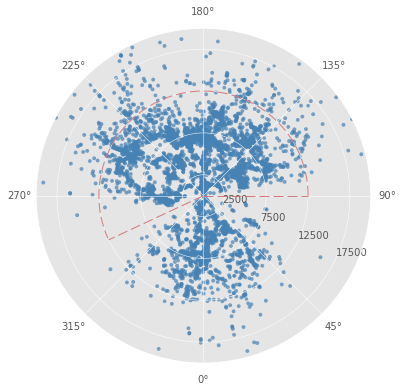

In [26]:
fig = plt.figure( figsize=(6,6)) 
ax = fig.add_subplot(111, projection='polar') 
sct = ax.scatter(coords_uzc.ra.radian[selection_dec], uzc_czs[selection_dec],
                 color='SteelBlue', s=uzcat2['Zmag'][selection_dec * selection_czs],
                 edgecolors="none", alpha=0.7, zorder=0) 
ax.set_rlim(0,20000) 
ax.set_theta_offset(np.pi/-2) 
ax.set_rlabel_position(65) 
ax.set_rticks(range(2500, 20001, 5000)); 
ax.plot([(ramin * u.deg).to(u.radian).value, (ramin * u.deg).to(u.radian).value], [0, 12500],
        color='IndianRed', alpha=0.8, dashes=(10,4)) 
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500], color='IndianRed', alpha=0.8, dashes=(10, 4)) 
theta = np.arange(ramin, ramax, 1) 
ax.plot(theta*np.pi/180., np.ones_like(theta)*12500, color='IndianRed', alpha=0.8, dashes=(10, 4)) 

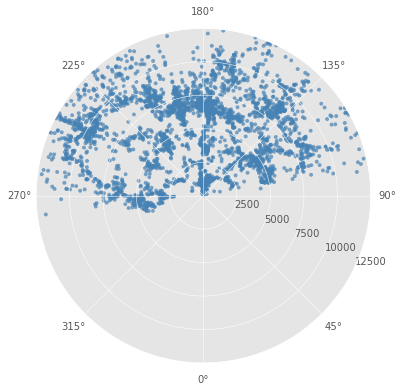

In [27]:
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(111, polar=True) 
sct = ax.scatter(coords_uzc.ra.radian[selection], uzc_czs[selection], color='SteelBlue', 
                 s=uzcat2['Zmag'][selection], edgecolors="none", alpha=0.7, zorder=0) 
ax.set_rlim(0,12500) 
ax.set_theta_offset(np.pi/-2) 
ax.set_rlabel_position(65) 
ax.set_rticks(range(2500,12501,2500)); 